# ¿Quién jugará el próximo partido?

Variables: rendimiento, repuesto, amistad

* Si tienes un buen rendimiento en entrenamiento y la amistad es mediana o buena, jugará bastante (Busquets)
* Si tienes un mal rendimiento en el entrenamiento y la amistad es buena, jugará bastante (F.T.)
* Si tienes un mal rendimiento en entrenamiento y poca amistad, jugarás poco (Rakitic)
* Si tienes una buen rendimiento en el entrenamiento, la amistad es mala y ningún repuesto, jugará mucho (Messi con Setien)
* Si tienes una buen rendimiento en el entrenamiento, la amistad es mala y tiene repuesto, jugará poco (Etoo en Guardiola)
* Si tienes una muy buen rendimiento en el entrenamiento, la amistad es mala y tiene repuesto, jugarás mucho (Parejo en Setien)

In [1]:
%pip install scikit-fuzzy==0.4.2 #La libreria 0.5 es más reciente pero tiene problemas con el ControlSystem.view()
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894076 sha256=7f360d08696adc0654c50780231d22a6cc42e5ef588f827f81fda1b022cd361c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
# Variables de entrada
rendiment = ctrl.Antecedent(np.arange(0, 11, 1), 'rendiment')
recanvi = ctrl.Antecedent(np.arange(0, 11, 1), 'recanvi')
relacio = ctrl.Antecedent(np.arange(0, 11, 1), 'relacio')

# Variable de salida
jugara = ctrl.Consequent(np.arange(0, 101, 1), 'jugara')

In [4]:
# Funciones de pertenencia automática
rendiment.automf(3)
recanvi.automf(3)
relacio.automf(3)

In [11]:
# Funciones de pertenencia personalizadas
jugara['poc'] = fuzz.trimf(jugara.universe, [0, 0, 50])
jugara['prou'] = fuzz.trimf(jugara.universe, [0, 50, 100])
jugara['molt'] = fuzz.trimf(jugara.universe, [50, 100, 100])

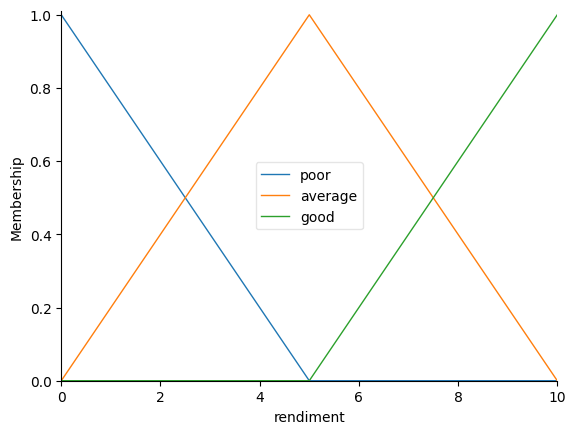

In [12]:
rendiment.view()

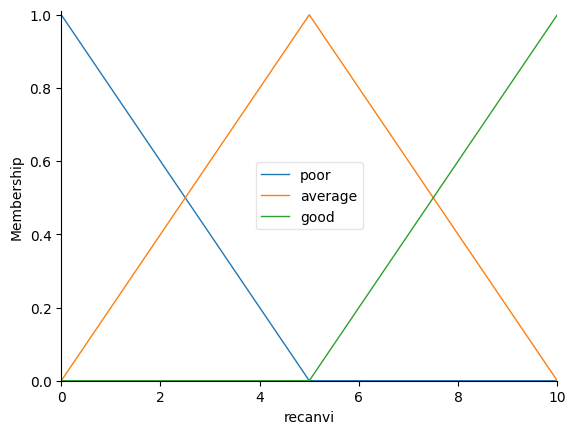

In [13]:
recanvi.view()

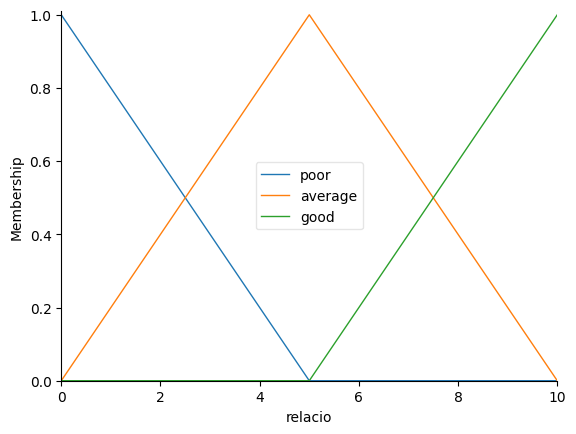

In [14]:
relacio.view()

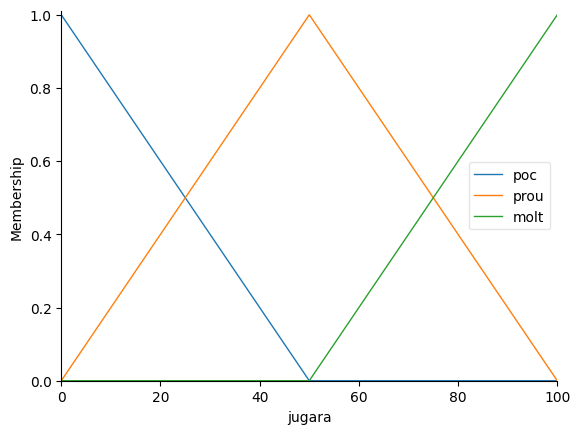

In [15]:
jugara.view()

In [16]:
# Reglas

# Si tienes un buen rendimiento en entrenamiento y la amistad es mediana o buena, jugará bastante (Busquets)
# Si tienes un mal rendimiento en el entrenamiento y la amistad es buena, jugará bastante (F.T.)
# Si tienes un mal rendimiento en entrenamiento y poca amistad, jugarás poco (Rakitic)
# Si tienes una buen rendimiento en el entrenamiento, la amistad es mala y ningún repuesto, jugará mucho (Messi con Setien)
# Si tienes una buen rendimiento en el entrenamiento, la amistad es mala y tiene repuesto, jugará poco (Etoo en Guardiola)
# Si tienes una muy buen rendimiento en el entrenamiento, la amistad es mala y tiene repuesto, jugarás mucho (Parejo en Setien)

rule1 = ctrl.Rule(rendiment['good'] & (relacio['average'] | relacio['good']), jugara['prou'])
rule2 = ctrl.Rule(rendiment['poor'] & relacio['good'], jugara['prou'])
rule3 = ctrl.Rule(rendiment['poor'] & relacio['poor'], jugara['poc'])
rule4 = ctrl.Rule(rendiment['good'] & relacio['poor'] & (recanvi['poor'] | recanvi['average']), jugara['molt'])
rule5 = ctrl.Rule(rendiment['good'] & relacio['poor'] & recanvi['good'], jugara['poc'])
rule6 = ctrl.Rule(rendiment['average'] & relacio['poor'] & recanvi['good'], jugara['molt'])

control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [17]:
# Simulación
simulacio = ctrl.ControlSystemSimulation(control)

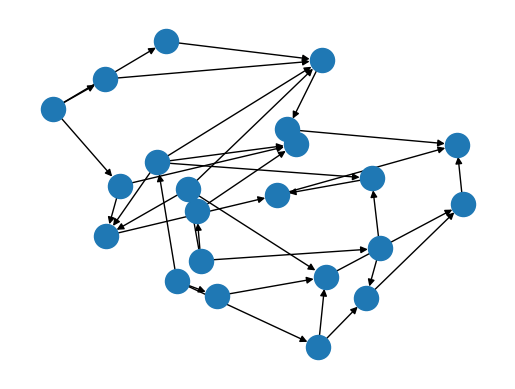

In [18]:
control.view()

In [19]:
# Entrada de datos

simulacio.input['rendiment'] = 8
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 2

58.78048780487803


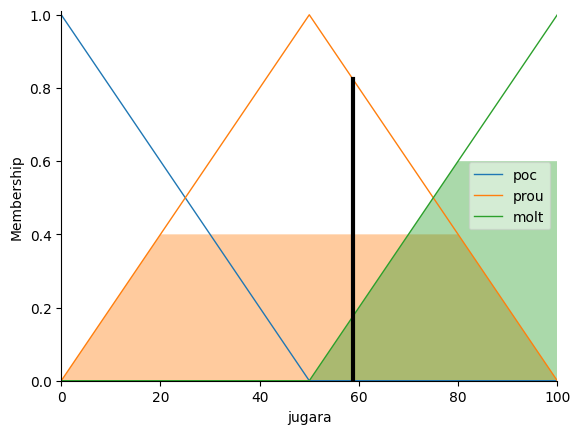

In [20]:
simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)

20.416666666666657


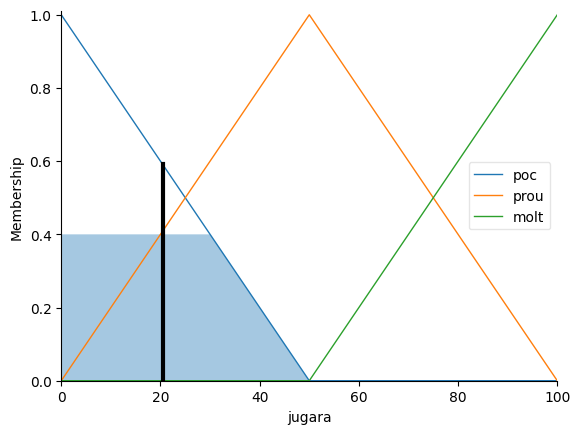

In [23]:
# Entrada de datos 2

simulacio.input['rendiment'] = 3
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 2

simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)

50.00000000000004


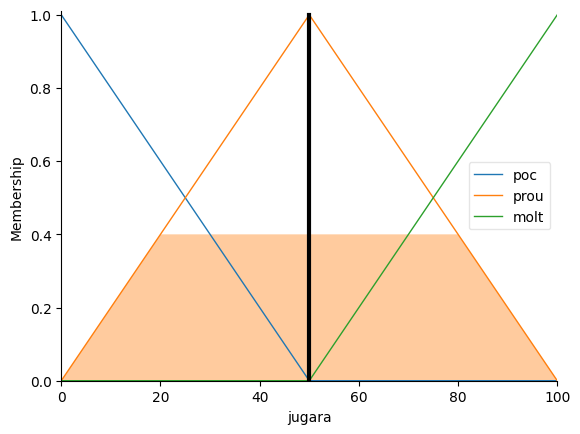

In [24]:
# Entrada de datos 3

simulacio.input['rendiment'] = 3
simulacio.input['recanvi'] = 3
simulacio.input['relacio'] = 8

simulacio.compute()
print(simulacio.output['jugara'])
jugara.view(sim=simulacio)